## Dependencies

In [1]:
import os
os.chdir('../')

In [2]:
import torch
from torchvision.transforms import transforms
from src.utils import BrainTumorSegmentationDataset, CustomDataLoader
from torch.utils.data import random_split
import csv
from src.utils import BCEDiceLoss, dice_coefficient
import torch.optim as optim
from src.model3 import MobileNetV3UNet

# For testing, assume ConfigurationManager returns an instance of UNetRTrainerConfig.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
## Global parameters
H,W = 256,256
torch.manual_seed(42)
batch_size = 16
lr = 1e-3
num_epochs = 500
dataset_path = "./data/archive/"
model_dir = './models/model3/'
log_path = './logs/train_log_mobilenetv3_1.csv'
os.makedirs(model_dir,exist_ok=True)
model_path = os.path.join(model_dir, 'best_model1.pt')
print(device)

cuda


## Load Dataset

In [3]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((H, W)),
    transforms.ToTensor()
])

full_dataset = BrainTumorSegmentationDataset(
    image_dir=os.path.join(dataset_path, "images"), 
    mask_dir=os.path.join(dataset_path, "masks"),
    transform=transform
)

# Split dataset
train_size = int(0.95 * len(full_dataset))
valid_size = len(full_dataset) - train_size

train_dataset, valid_dataset = random_split(full_dataset, [train_size, valid_size])

train_loader = CustomDataLoader(train_dataset,batch_size=batch_size,shuffle=True)
valid_loader = CustomDataLoader(valid_dataset,batch_size=batch_size,shuffle=True)

## Train

In [4]:
from src.train import train_UNet
model = MobileNetV3UNet()
train_UNet(model, train_loader, valid_loader, device, num_epochs, lr, model_path=model_path, log_path=log_path)


c:\Projects\python\mainenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Projects\python\mainenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/500, Train Loss: 1.3486, Valid Loss: 1.2129, Valid Dice: 0.4998, Patience: 0
Epoch 2/500, Train Loss: 0.9384, Valid Loss: 0.8461, Valid Dice: 0.5114, Patience: 0
Epoch 3/500, Train Loss: 0.5353, Valid Loss: 0.4804, Valid Dice: 0.6685, Patience: 0
Epoch 4/500, Train Loss: 0.2942, Valid Loss: 0.3547, Valid Dice: 0.7353, Patience: 0
Epoch 5/500, Train Loss: 0.2285, Valid Loss: 0.2864, Valid Dice: 0.7776, Patience: 0
Epoch 6/500, Train Loss: 0.1947, Valid Loss: 0.2816, Valid Dice: 0.7720, Patience: 0
Epoch 7/500, Train Loss: 0.1765, Valid Loss: 0.2646, Valid Dice: 0.7858, Patience: 0
Epoch 8/500, Train Loss: 0.1674, Valid Loss: 0.2348, Valid Dice: 0.8088, Patience: 0
Epoch 9/500, Train Loss: 0.1522, Valid Loss: 0.2200, Valid Dice: 0.8195, Patience: 0
Epoch 10/500, Train Loss: 0.1456, Valid Loss: 0.2181, Valid Dice: 0.8209, Patience: 0
Epoch 11/500, Train Loss: 0.1420, Valid Loss: 0.2480, Valid Dice: 0.7953, Patience: 1
Epoch 12/500, Train Loss: 0.1456, Valid Loss: 0.2242, Valid Dic

## Loss curves

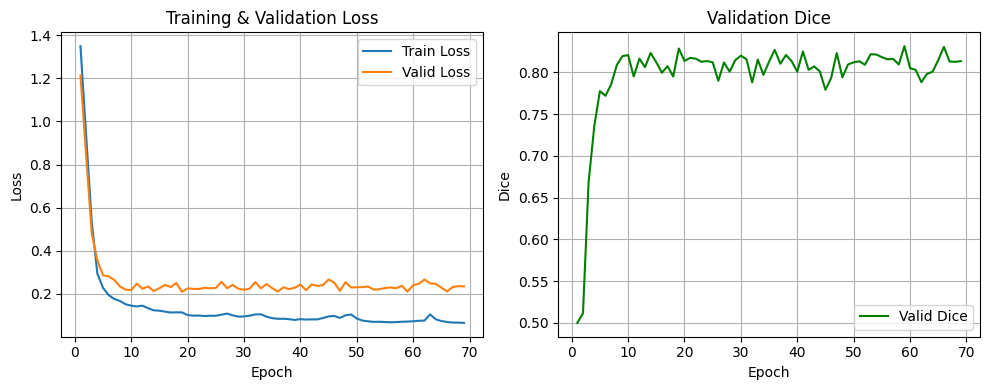

In [5]:
from src.utils import plot_loss_curves
plot_loss_curves(log_path=log_path)